<a href="https://colab.research.google.com/github/milkywaypeko/ASD_ID_FI_Correlation/blob/main/ASD_ID_FI_Correlation_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#Define Region Name
regionDic = {'Seoul':'서울특별시', 'Busan' : '부산광역시', 'Daegu' : '대구광역시', 'Incheon' : '인천광역시', 'Gwangju' : '광주광역시', 'Daejeon' : '대전광역시', 'Ulsan' : '울산광역시', 'Sejong' : '세종특별자치시',
             'Gyeonggi-do' : '경기도', 'Gangwon-do' : '강원도', 'Chungcheongbuk-do' : '충청북도', 'Chungcheongnam-do' : '충청남도', 'Jeollabuk-do' : '전라북도', 'Jeollanam-do' : '전라남도',
             'Gyeongsangbuk-do' : '경상북도', 'Gyeongsangnam-do' : '경상남도', 'Jeju' : '제주특별자치도'}

In [3]:
#Import Disabled Population Statistics
disabledPopulation = {}
for EnglishName, KoreanName in regionDic.items():
    disabledPopulation[EnglishName] = pd.read_csv('https://raw.githubusercontent.com/milkywaypeko/ASD_ID_FI_Correlation/main/Statistics/Disabled/Population%20of%20the%20disabled%20in%20{name}.csv'.format(name=EnglishName))
    #Label Disabled Population Statistics
    disabledPopulation[EnglishName].insert(0, '광역자치단체', KoreanName)
    
disabledPopulation['Gyeonggi-do'].drop('남/북',axis=1, inplace=True)

In [4]:
#Import Population Statistics
populationDic = {}
for EnglishName, KoreanName in regionDic.items():
    populationDic[EnglishName] = pd.read_csv('https://raw.githubusercontent.com/milkywaypeko/ASD_ID_FI_Correlation/main/Statistics/Population/Resident%20population%20of%20{name}.csv'.format(name=EnglishName))
    #Label Population Statistics
    populationDic[EnglishName].insert(0, '광역자치단체', KoreanName)
    
populationDic['Gyeonggi-do'].drop('남/북',axis=1, inplace=True)

In [5]:
#Import Financial independence Statistics
financial_Independence = {}
for EnglishName, KoreanName in regionDic.items():
    financial_Independence[EnglishName] = pd.read_csv('https://raw.githubusercontent.com/milkywaypeko/ASD_ID_FI_Correlation/main/Statistics/Finance/Financial%20Independence%20of%20{name}.csv'.format(name=EnglishName))
    #Label Population Statistics
    financial_Independence[EnglishName].insert(0, '광역자치단체', KoreanName)
    
financial_Independence['Gyeonggi-do'].drop('시/군',axis=1, inplace=True)

In [6]:
#Connect Disabled Population Statistics
dataD = pd.concat(disabledPopulation, ignore_index=True)
#Connect Population Statistics
dataP = pd.concat(populationDic, ignore_index=True)
#Connect Finance Statistics
dataF = pd.concat(financial_Independence, ignore_index=True)

In [7]:
#Merge All Statistics
temp = pd.merge(dataD, dataP)
data = pd.merge(temp, dataF)

In [8]:
#Make Statistics For Developmental Disability
data['발달장애'] = data['지적장애'] + data['자폐성']

#Make Rate of Intellectual disability
data['지적장애_비율'] = data['지적장애'] / data['인구']

#Make Rate of Autistic Spectrum Disorder
data['자폐성_비율'] = data['자폐성'] / data['인구']

#Make Rate of Developmental Disability
data['발달장애_비율'] = data['발달장애'] / data['인구']

#Make Rate of Developmental Disability of Autistic Spectrum Disorder
data['발달_자폐성_비율'] = data['자폐성'] / data['발달장애']

#For label in english
data.rename(columns = {'광역자치단체' : 'RLG', '기초자치단체' : 'BLG', '지적장애' : 'ID', '자폐성' : 'ASD', '인구' : 'Population',  '재정자립도 (%)' : 'Financial_Independence', '재정자주도 (%)' : 'Financial_often', '발달장애' : 'DD', '지적장애_비율' : 'ID_rate', '자폐성_비율':'ASD_rate', '발달장애_비율' : 'DD_rate', '발달_자폐성_비율':'DD_ASD_rate'}, inplace = True)

#Column arrange
data = data[['RLG', 'BLG', 'ID', 'ASD', 'DD', 'Population', 'ID_rate', 'ASD_rate', 'DD_rate', 'DD_ASD_rate', 'Financial_Independence', 'Financial_often']]

data

,RLG,BLG,ID,ASD,DD,Population,ID_rate,ASD_rate,DD_rate,DD_ASD_rate,Financial_Independence,Financial_often
0,서울특별시,종로구,396,111,507,161869,0.002446,0.000686,0.003132,0.218935,47.408302,63.576182
1,서울특별시,중구,304,67,371,136488,0.002227,0.000491,0.002718,0.180593,54.928717,61.137462
2,서울특별시,용산구,530,106,636,245185,0.002162,0.000432,0.002594,0.166667,39.182358,55.529962
3,서울특별시,성동구,710,174,884,308979,0.002298,0.000563,0.002861,0.196833,32.502263,54.757351
4,서울특별시,광진구,818,167,985,366972,0.002229,0.000455,0.002684,0.169543,26.716462,51.975160
...,...,...,...,...,...,...,...,...,...,...,...,...
222,경상남도,산청군,322,19,341,35430,0.009088,0.000536,0.009625,0.055718,8.900000,58.900000
223,경상남도,함양군,250,16,266,39506,0.006328,0.000405,0.006733,0.060150,10.000000,59.300000
224,경상남도,거창군,382,26,408,62005,0.006161,0.000419,0.006580,0.063725,8.900000,58.600000
225,경상남도,합천군,382,14,396,44582,0.008568,0.000314,0.008883,0.035354,8.800000,64.000000


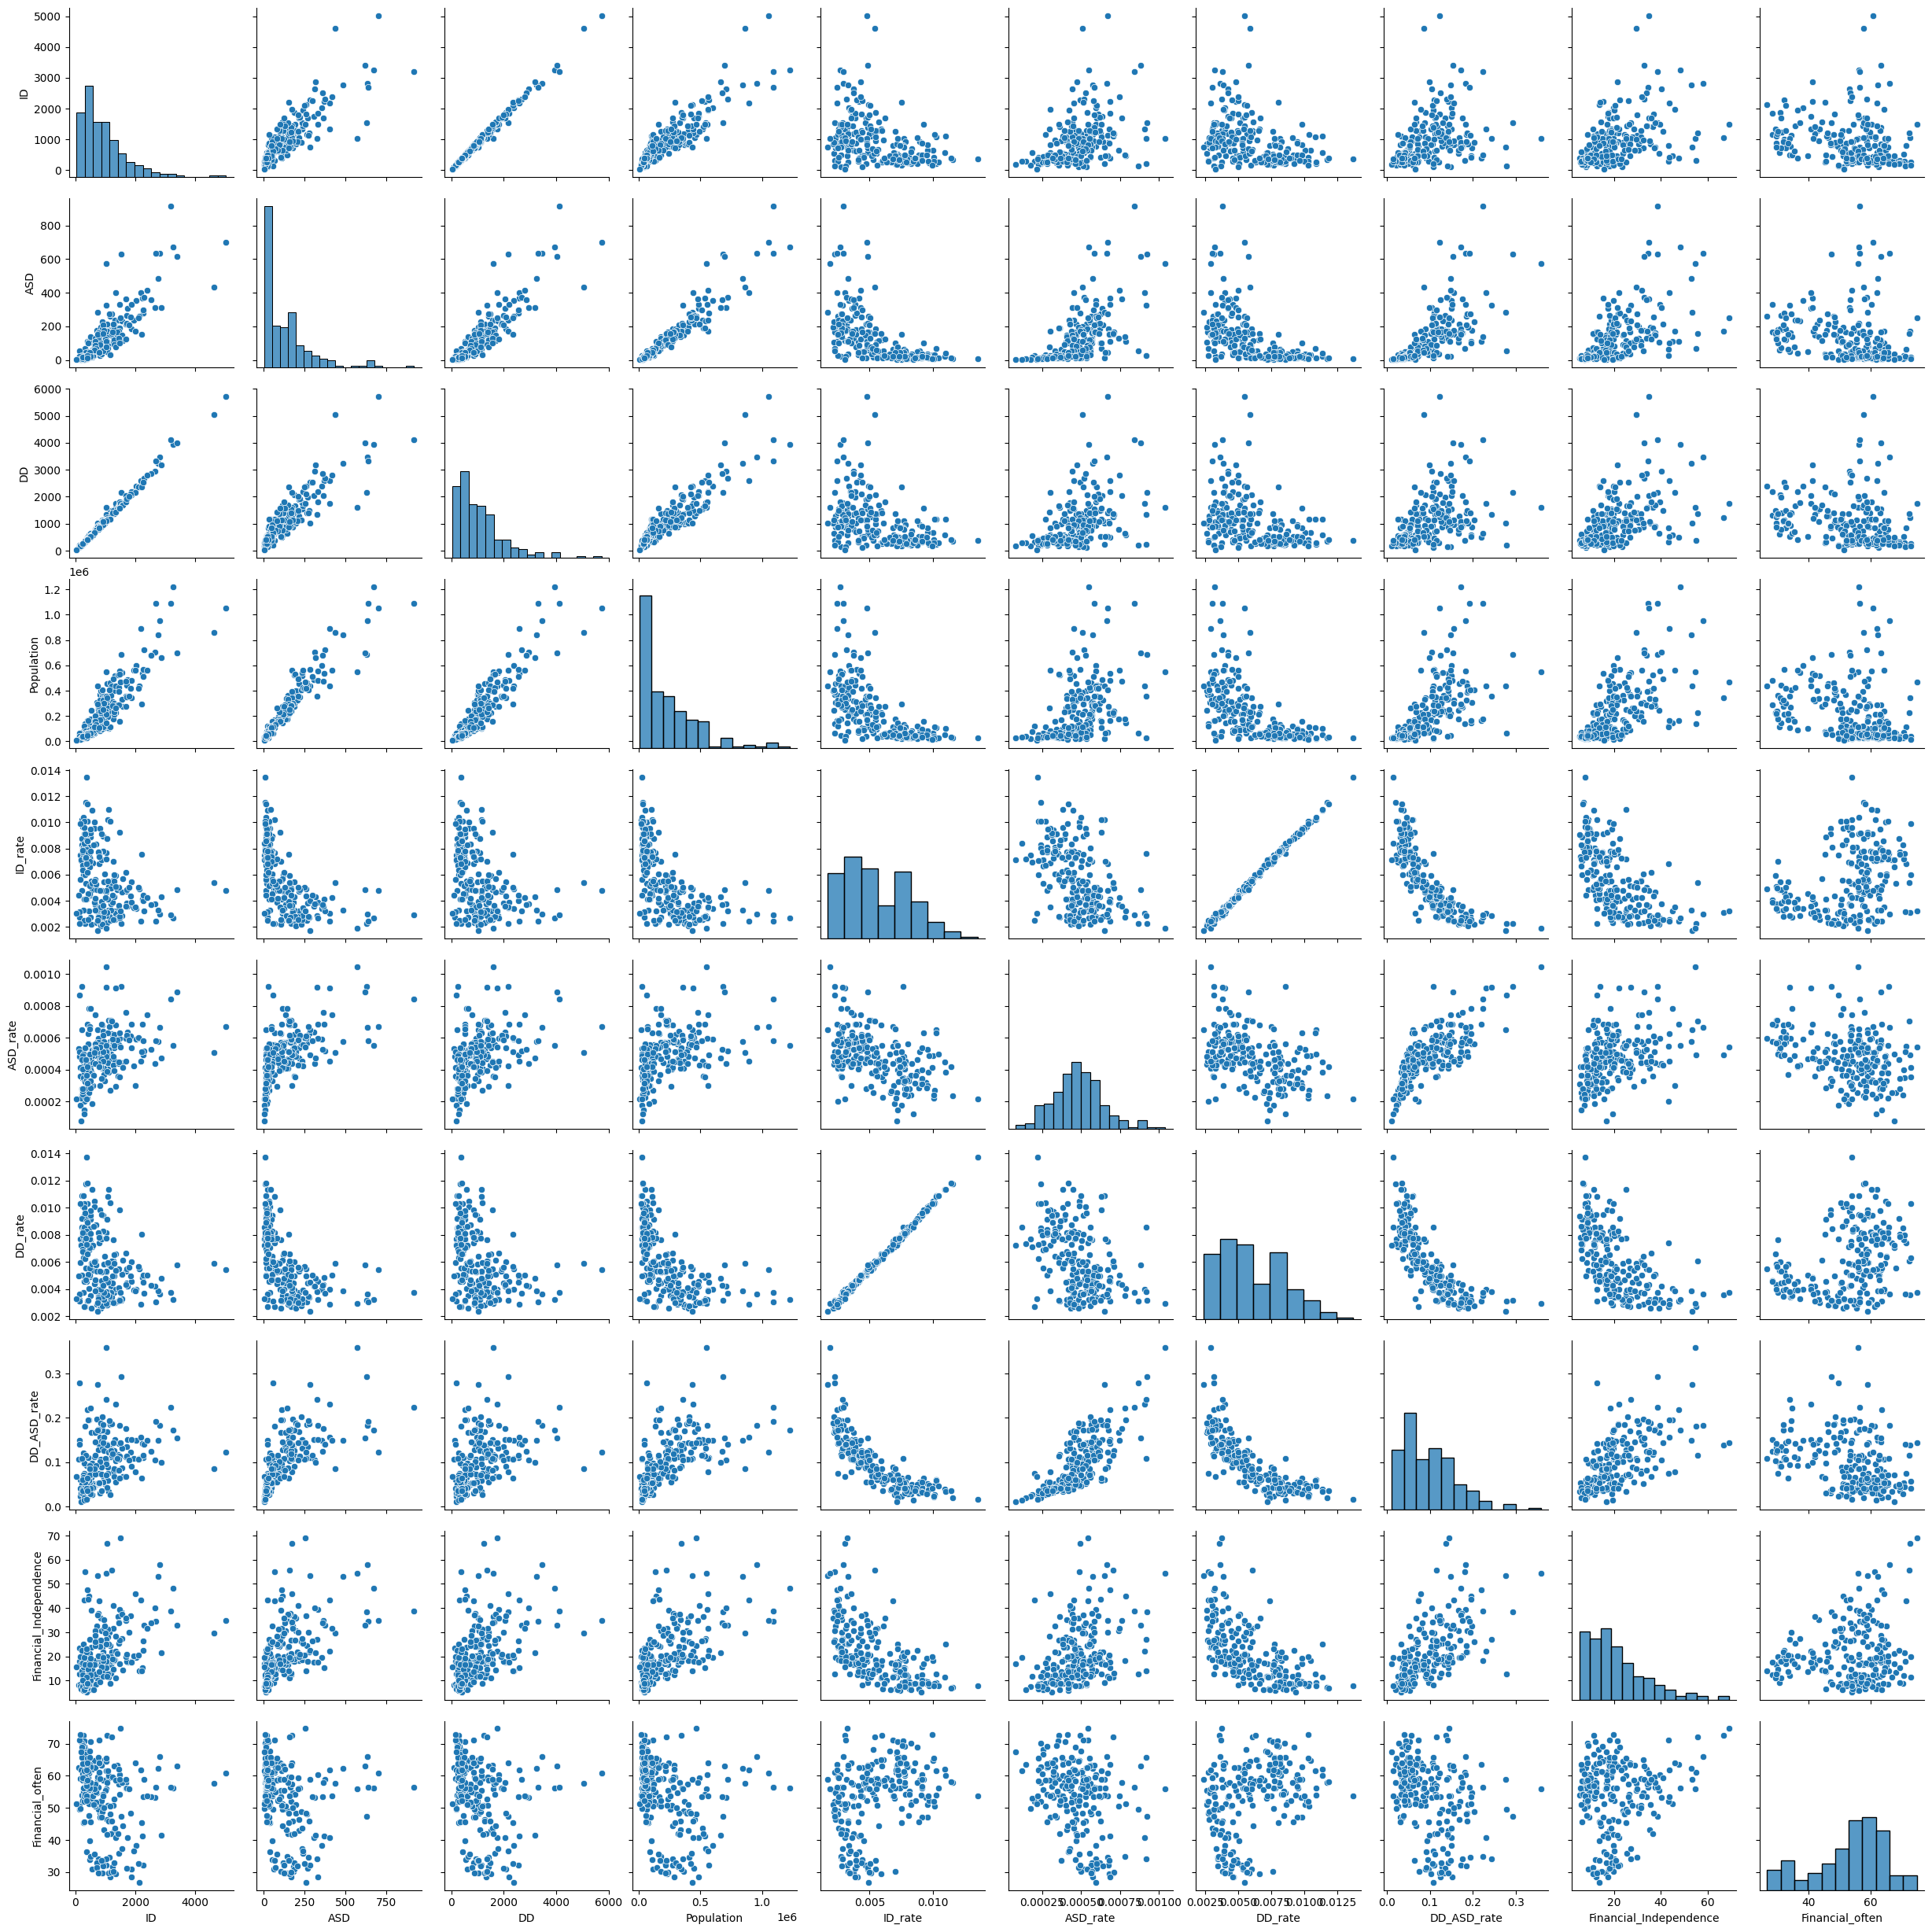

In [9]:
#Drow for find Correlation
sns.pairplot(data)

In [10]:
#Linear regression (X=Financial_Independence Y=ASD_rate) with statsmodels.formula.api  of scikit-learn 
ASD_rate_ols_smf = smf.ols(formula='ASD_rate ~ Financial_Independence', data=data)

ASD_rate_ols_smf_results = ASD_rate_ols_smf.fit()
ASD_rate_ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASD_rate   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     37.09
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           4.83e-09
Time:                        11:51:21   Log-Likelihood:                 1682.4
No. Observations:                 227   AIC:                            -3361.
Df Residuals:                     225   BIC:                            -3354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0004   1.95e-05     19.406      0.000       0.000       0.000
Financial_Independence  4.873e-06      8e-07      6.090      0.000     3.3e-06    6.45e-06
==============================================================================
Omnibus:                       10.682   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.519
Skew:                           0.437   Prob(JB):                      0.00315
Kurtosis:                       3.673   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Financial_Independence', ylabel='ASD_rate'>

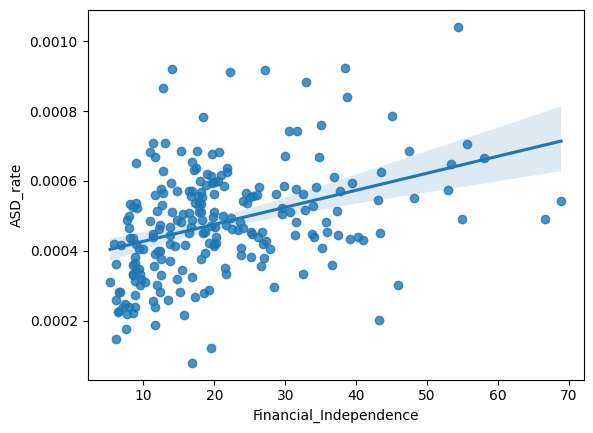

In [11]:
#Draw a graph (X=Financial_Independence Y=ASD_rate) with seaborn
sns.regplot(x='Financial_Independence', y='ASD_rate', data=data)

In [12]:
#Linear regression (X=Financial_Independence Y=ID_rate) with statsmodels.formula.api  of scikit-learn 
ID_rate_ols_smf = smf.ols(formula='ID_rate ~ Financial_Independence', data=data)

ID_rate_ols_smf_results = ID_rate_ols_smf.fit()
ID_rate_ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ID_rate   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           1.35e-24
Time:                        11:51:22   Log-Likelihood:                 1092.3
No. Observations:                 227   AIC:                            -2181.
Df Residuals:                     225   BIC:                            -2174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0082      0.000     31.273      0.000       0.008       0.009
Financial_Independence    -0.0001   1.08e-05    -11.569      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        6.805   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.962
Skew:                           0.406   Prob(JB):                       0.0308
Kurtosis:                       2.723   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Financial_Independence', ylabel='ID_rate'>

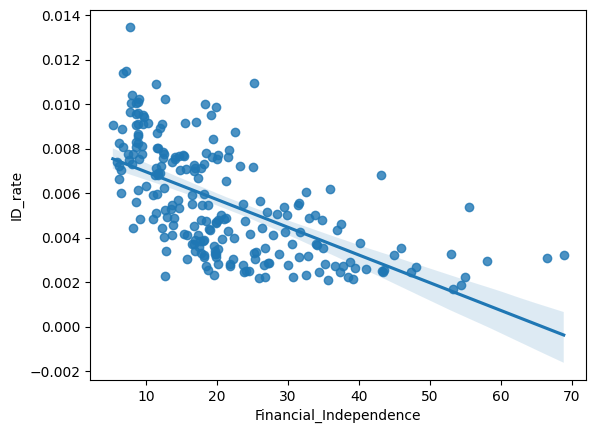

In [13]:
#Draw a graph (X=Financial_Independence Y=ID_rate) with seaborn
sns.regplot(x='Financial_Independence', y='ID_rate', data=data)

In [14]:
#Linear regression (X=Financial_Independence Y=DD_rate) with statsmodels.formula.api  of scikit-learn 
DD_rate_ols_smf = smf.ols(formula='DD_rate ~ Financial_Independence', data=data)

DD_rate_ols_smf_results = DD_rate_ols_smf.fit()
DD_rate_ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DD_rate   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           5.85e-24
Time:                        11:51:22   Log-Likelihood:                 1097.4
No. Observations:                 227   AIC:                            -2191.
Df Residuals:                     225   BIC:                            -2184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0086      0.000     33.457      0.000       0.008       0.009
Financial_Independence    -0.0001   1.05e-05    -11.368      0.000      -0.000   -9.89e-05
==============================================================================
Omnibus:                        7.530   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.783
Skew:                           0.435   Prob(JB):                       0.0204
Kurtosis:                       2.741   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Financial_Independence', ylabel='DD_rate'>

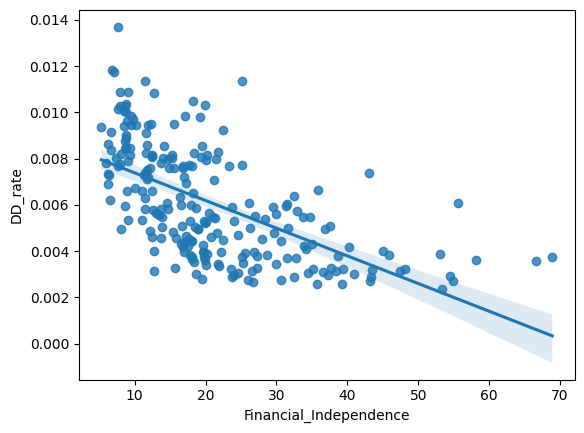

In [15]:
#Draw a graph (X=Financial_Independence Y=DD_rate) with seaborn
sns.regplot(x='Financial_Independence', y='DD_rate', data=data)

In [16]:
#Linear regression (X=Financial_Independence Y=DD_ASD_rate) with statsmodels.formula.api  of scikit-learn 
DD_ASD_rate_ols_smf = smf.ols(formula='DD_ASD_rate ~ Financial_Independence', data=data)

DD_ASD_rate_ols_smf_results = DD_ASD_rate_ols_smf.fit()
DD_ASD_rate_ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DD_ASD_rate   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           1.44e-24
Time:                        11:51:22   Log-Likelihood:                 372.19
No. Observations:                 227   AIC:                            -740.4
Df Residuals:                     225   BIC:                            -733.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0358      0.006      5.719      0.000       0.023       0.048
Financial_Independence     0.0030      0.000     11.560      0.000       0.002       0.003
==============================================================================
Omnibus:                       34.191   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.355
Skew:                           0.859   Prob(JB):                     2.59e-12
Kurtosis:                       4.641   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Financial_Independence', ylabel='DD_ASD_rate'>

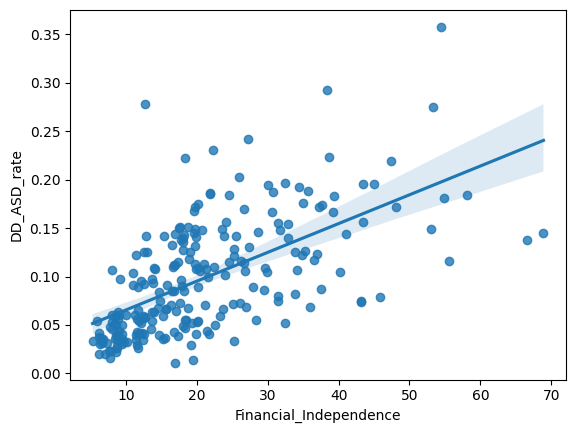

In [17]:
#Draw a graph (X=Financial_Independence Y=DD_ASD_rate) with seaborn
sns.regplot(x='Financial_Independence', y='DD_ASD_rate', data=data)